In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
from statsmodels.sandbox.stats.runs import runstest_1samp
import statistics as s
from sklearn.preprocessing import MinMaxScaler, normalize
from scipy.stats import chi2_contingency
from pandasql import sqldf
from collections import OrderedDict
import os

In [2]:
dir = 'D:/Computational Thinking and DS/HW1 8.22-8.26/data_airbnb'
os.chdir(dir)

In [3]:
listing = pd.read_csv('Listings.csv', encoding = 'latin1')
review = pd.read_csv('Reviews.csv', encoding = 'latin1')

raw_listing = listing.copy()
raw_review = review.copy()

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
raw_listing.sort_values('listing_id').head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
85045,2577,Loft for 4 by Canal Saint Martin,2827,2008-09-09,"Casablanca, Grand Casablanca, Morocco",a few days or more,0.00,0.67,f,2.0,...,3,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t
37163,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",within a few hours,0.93,0.26,f,6.0,...,30,1125,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f
105556,2737,"Elif's room in cozy, clean flat.",3047,2008-09-18,"Rome, Lazio, Italy",within a day,1.00,0.00,f,5.0,...,7,1125,96.0,9.0,9.0,10.0,10.0,9.0,9.0,f
159807,2903,Stay a night in Calisto6 B&B Rome,3280,2008-09-28,"Rome, Lazio, Italy",within a few hours,1.00,1.00,f,3.0,...,1,730,86.0,9.0,9.0,9.0,9.0,9.0,9.0,f
227261,3079,Cozy apartment (2-4)with Colisseum view,3504,2008-10-08,"Rome, Lazio, Italy",NaN,NaN,0.67,f,7.0,...,3,120,88.0,8.0,9.0,9.0,10.0,10.0,9.0,f


Formalize the dataset, giving readable columns readable and capitalized names.

In [5]:
'''
def formalize(df):
    new_col = []
    for i in df.columns:
        new_col.append(i.title())
    
    for i in new_col:
        for j in range(len(i)):
            if i[j] == '_':
                upper(i[j + 1])
                i.pop(j)
    return new_col
formalize(raw_review)'''

"\ndef formalize(df):\n    new_col = []\n    for i in df.columns:\n        new_col.append(i.title())\n    \n    for i in new_col:\n        for j in range(len(i)):\n            if i[j] == '_':\n                upper(i[j + 1])\n                i.pop(j)\n    return new_col\nformalize(raw_review)"

# Preprocessing the Datasets

To check the overall conditions and null values, wrap functions up to summarize.

In [6]:
def overall_cond(df):
    # 1 Summary
    df.info()
    
    # 2 Empty Values
    n_null = df.isnull().sum().values
    
    with_null = n_null[n_null > 0]
    
    # 3 Histogram for empty values
    if sum(with_null) > 0:
        labels = list(df.columns[n_null > 0])
        plt.figure(figsize = (20, 10))
        plt.bar(labels, with_null, linewidth = 10)
        plt.xticks(rotation = 40)
        plt.title('Null Values')
    else: print('There is no empty values in the table.')
    return

## Checking Data

### Listing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

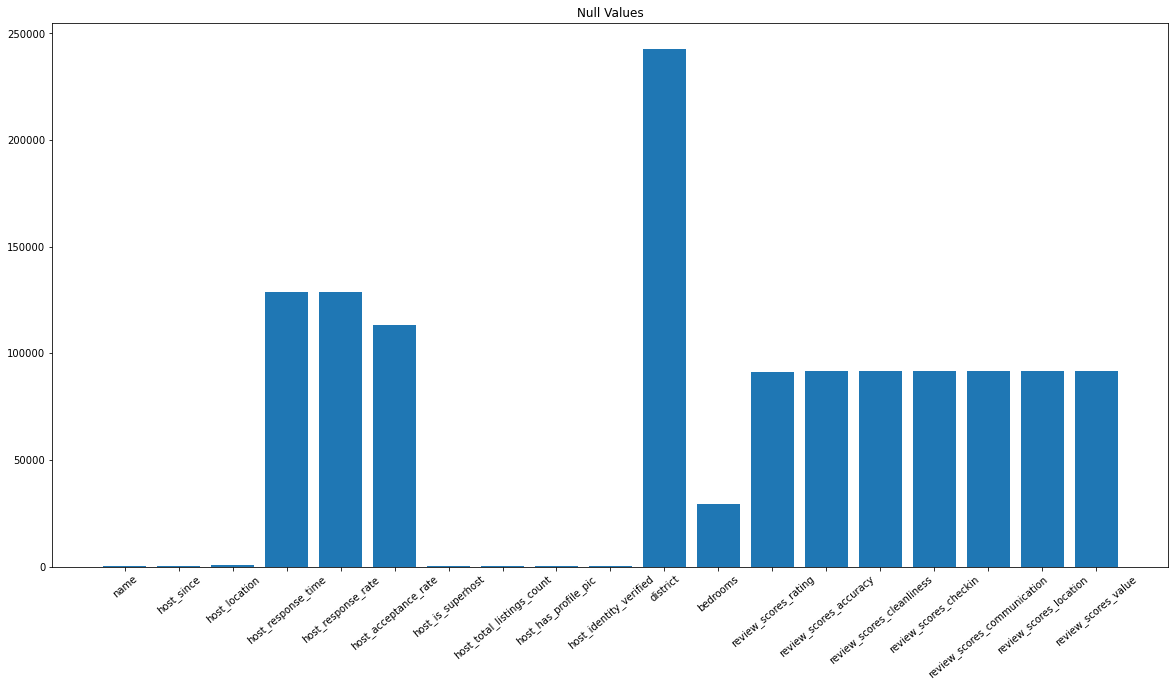

In [7]:
overall_cond(raw_listing)

### Rating Times Data

In [8]:
overall_cond(raw_review)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   listing_id   int64 
 1   review_id    int64 
 2   date         object
 3   reviewer_id  int64 
dtypes: int64(3), object(1)
memory usage: 164.0+ MB
There is no empty values in the table.


There is no empty values in the rating times data.

## Data Cleaning

First, join the two tables using the listing ID column.

In [9]:
'''
raw_review.sort_values('listing_id'); raw_listing.sort_values('listing_id')
raw_df = raw_listing.merge(raw_review, how = 'right')
raw_df.head()
raw_df.columns'''

"\nraw_review.sort_values('listing_id'); raw_listing.sort_values('listing_id')\nraw_df = raw_listing.merge(raw_review, how = 'right')\nraw_df.head()\nraw_df.columns"

Note that a listing may have more than one review, thus I used left join.

### Correlation 

Note that missing values concentrate in rating terms (which might be due to simply skipping these scorings when writing feedbacks), I decide to estimate these missing values with the current available ones. 

I first try to find the correlations between features require filling and other features that might be decisive to them. For instance, the most important feature, overall ratings, might be mostly correlated to the cleanness,then accuracy, ..., so I rank the correlations between these deciding features and overall ratings using their currently available values. 

Then according to the rank, I fill the overall ratings with these features values in descending correlation order: **values of more important deciding features will be priorly used to fll the overall ratings first**. 

First, I fill the overall rating ('review_scores_value' in the columns) as it is the most notable thing in the reviews and we concern the most. 

I choose 'price', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic' and 'host_identity_verified' to do the correlation design. There are non-digital features among these so I find them out and transfer them. Use 0 to stand for 'f' and 1 for 't'.

We want to find those features correlated to overall rating the most.

In [10]:
'''rating_features = ['host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location']

def transtf(col):
    if col == 'f': col = 0
    elif col == 't': col = 1
    return col
    

for i in range(len(rating_features)):
    if set(raw_listing[rating_features].unique()) == set(['t', 'f']):
        raw_listing[rating_features[i]] = raw_listing[rating_features[i]].map(transtf)
raw_listing[rating_features].dtypes
'''

"rating_features = ['host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location']\n\ndef transtf(col):\n    if col == 'f': col = 0\n    elif col == 't': col = 1\n    return col\n    \n\nfor i in range(len(rating_features)):\n    if set(raw_listing[rating_features].unique()) == set(['t', 'f']):\n        raw_listing[rating_features[i]] = raw_listing[rating_features[i]].map(transtf)\nraw_listing[rating_features].dtypes\n"

In [11]:
'''
rating_coefs = []

for i in rating_features:
    extr = raw_listing[~(raw_listing[i].isnull()) & ~(raw_listing['review_scores_value'].isnull())].copy()
    rating_coefs.append(extr[[i, 'review_scores_value']].corr().iloc[0][1])

dict_coef = {rating_features[i]: rating_coefs[i] for i in range(len(rating_features))}
sorted_fnc =  sorted(dict_coef.items(), key = lambda x: x[1], reverse = True)
sorted_fnc'''

"\nrating_coefs = []\n\nfor i in rating_features:\n    extr = raw_listing[~(raw_listing[i].isnull()) & ~(raw_listing['review_scores_value'].isnull())].copy()\n    rating_coefs.append(extr[[i, 'review_scores_value']].corr().iloc[0][1])\n\ndict_coef = {rating_features[i]: rating_coefs[i] for i in range(len(rating_features))}\nsorted_fnc =  sorted(dict_coef.items(), key = lambda x: x[1], reverse = True)\nsorted_fnc"

The results above indeed show factors we attach importance to when we book housings. After checking in, customers use  'review_scores_accuracy', the most correlated feature, to rate the accuracy of houses' description on the Airbnb according to what they see. This highly indicates the descrepancy between the customers' expectation and what they actually get, thus rating the truthfulness of the business. Cleanliness, the runner up, is another important feature customer look at. Also, quality communication has a similar importance. 

I will add more features to help fill the null value of overall ratings. 

The function below summarizes the methods above: coding boolean features, excluding nulls, calculating correlations and sorting features by correlation coefficients in descending order. I will prioritize features with a higher correlation coefficient with the overall rating to, using its value to fill the empty overall rating of a sample if this feature is not null; otherwise, I will use the second correlated feature value, ......, until the overall rating is filled.

In [12]:
def choose_features(rating_features, target_feature, df):
    # For binary features
    def transtf(col):
        if col == 'f': col = 0
        elif col == 't': col = 1
        return col
            
    # For other features --------------------------------------------------------
    def transobj(dfcolumn):
        dict_val = {}
        nonull_col = dfcolumn[dfcolumn.notnull()].copy()  # Do not encode Nulls
        for i in nonull_col.index:
            if dfcolumn.iloc[i] not in dict_val.keys():
                dict_val[dfcolumn.iloc[i]] = []
            dict_val[dfcolumn.iloc[i]].append(i)
        #dict_val = OrderedDict(sorted(dict_val.items()))# Sort the keys (unique column values) alphabetically
        return dict_val
    
    # Encode features, from string type to numerical type.
    non_incld = []        
    for i in range(len(rating_features)):
        if df[df[rating_features[i]].notnull()][rating_features[i]].iloc[0] == 't' or 'f':
            df[rating_features[i]] = df[rating_features[i]].map(transtf)
        elif [df[df[rating_features[i]].notnull()][rating_features[i]].dtypes][0] == 'str' :
            dic = transobj(df[rating_features[i]])
            for j in range(len(dic.keys())):
                df.loc[dic[rating_features[i]], [rating_features[i]]] = float(j)   
        else: 
            non_incld.append(rating_features[i])   # If a selected feature does not belong to both boolean and categorical type.

    #-----------------------------------------------------------------------------
    
    
    
    rating_coefs = []

    for i in rating_features:
        extr = df[~(df[i].isnull()) & ~(df[target_feature].isnull())]
        rating_coefs.append(extr[[i, target_feature]].corr().iloc[0][1])

    dict_coef = {rating_features[i]: rating_coefs[i] for i in range(len(rating_features))}
    sorted_fnc =  sorted(dict_coef.items(), key = lambda x: x[1], reverse = True)

    
    return df, sorted_fnc, non_incld

In [13]:
rating_features = ['host_response_rate', 'review_scores_checkin', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location']
trans_df, cor_chart, not_included = choose_features(rating_features, 'review_scores_value', raw_listing)

In [14]:
cor_chart

[('review_scores_accuracy', 0.7174472944617598),
 ('review_scores_cleanliness', 0.6541490370279983),
 ('review_scores_communication', 0.6348343386391488),
 ('review_scores_checkin', 0.5951674090865514),
 ('review_scores_location', 0.53264449045655),
 ('host_is_superhost', 0.18614887434269886),
 ('host_response_rate', 0.09923372792458196),
 ('host_identity_verified', 0.0366392405116074),
 ('host_has_profile_pic', 0.007309295152902977),
 ('host_total_listings_count', -0.04902706628455049)]

### 1.2.2 Filling Empty Values

In [15]:
data_wiz_null = trans_df.copy()
data_wiz_null

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,0.0,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In this way, I can fill the feature 'review_scores_value' according to values of features in this order: 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication'. I will choose those features with a correlation coefficient higher than 0.5.

In [16]:
good_features = {}
for i in cor_chart:
    if i[1] >= 0.5:
        good_features[i[0]] = i[1]
good_features

{'review_scores_accuracy': 0.7174472944617598,
 'review_scores_cleanliness': 0.6541490370279983,
 'review_scores_communication': 0.6348343386391488,
 'review_scores_checkin': 0.5951674090865514,
 'review_scores_location': 0.53264449045655}

In [17]:
df_null_rating = data_wiz_null[data_wiz_null['review_scores_rating'].isnull()]
idx_null_rating = df_null_rating.index

In [18]:
if data_wiz_null['review_scores_value'].iloc[idx_null_rating[0]] == np.nan:
    print(data_wiz_null['review_scores_value'].iloc[idx_null_rating[0]])

I was confused about the insignificant correlation between superhost title and the ratings ('review_scores_value'), as normally, superhosts are those constantly recieve high ratings. Maybe it is the correlation coefficient that ignores their internal relationship.

So, I also want to use hypothesis tests to see the difference in distributions of overall ratings, between housings with different boolean feature values. Features 'host_is_superhost' and 'host_total_listings_count' are the two I want to use different ways to test their correlation to the overall ratings.

For 'host_is_superhost', a boolean feature, I first draw histogram of the rating values binarily partitioned into two classes by the 'host_is_superhost' values: whether the host is a superhost. This helps me estimate the possible distribution of the ratings from the two classes.

In [19]:
raw_listing[['host_total_listings_count', 'host_is_superhost']].describe()

,host_total_listings_count,host_is_superhost
count,279547.000000,279547.000000
mean,24.581612,0.179766
std,284.041143,0.383993
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,4.000000,0.000000
max,7235.000000,1.000000


It is quite likely that the listing count has outliers. Due to the distance between outliers and the majority which makes histogram unintelligible, I calculate 90% quantile to check the place of these outliers. Also, I want to see their distribution.

Text(0.5, 0, "Hosts' Number of Listings")

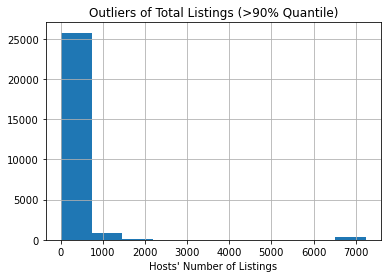

In [20]:
non_null_nlisting = raw_listing[(raw_listing['host_total_listings_count'].notnull()) & (raw_listing['host_total_listings_count'].notnull())]
q_nlisting = np.quantile(non_null_nlisting['host_total_listings_count'], .90)
non_null_nlisting[non_null_nlisting['host_total_listings_count'] > q_nlisting]['host_total_listings_count'].hist()
plt.title('Outliers of Total Listings (>90% Quantile)')
plt.xlabel('Hosts\' Number of Listings')

We exclude those listings whoes hosts have had more than 1000 deals; also, we classify the pillars into whether hosts are superhost
.

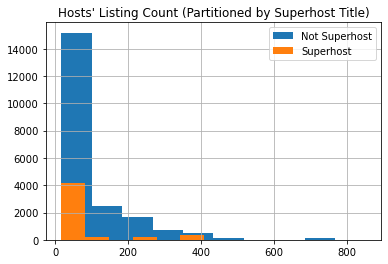

In [21]:
non_null_nlisting[(non_null_nlisting['host_total_listings_count'] > q_nlisting) & (non_null_nlisting['host_total_listings_count'] < 1000)\
                  & (non_null_nlisting['host_is_superhost'] == 0)]\
['host_total_listings_count'].hist()
non_null_nlisting[(non_null_nlisting['host_total_listings_count'] > q_nlisting) & (non_null_nlisting['host_total_listings_count'] < 1000)\
                  & (non_null_nlisting['host_is_superhost'] == 1)]\
['host_total_listings_count'].hist()
plt.legend(['Not Superhost', 'Superhost'])
plt.title('Hosts\' Listing Count (Partitioned by Superhost Title)')
plt.show()

According to this figure, I wonder if the percentage of popular hosts (have more listings) is higher in the superhost population than that in the non-superhosts, i.e. superhosts tend to have more of their houses rent.

I decide to firt use Chi-square Test: partition the counts of listings that hosts made into two parts: if it is higher than 50, then suppose the host to be a popular host. This tests whether the superhost is a influencing factor.

In [22]:
pop_ns_hosts = non_null_nlisting[(non_null_nlisting['host_total_listings_count'] > 50) & (non_null_nlisting['host_is_superhost'] == 0)]\
['host_total_listings_count']
pop_s_hosts = non_null_nlisting[(non_null_nlisting['host_total_listings_count'] > 50) & (non_null_nlisting['host_is_superhost'] == 1)]\
['host_total_listings_count']

norm_ns_hosts = non_null_nlisting[(non_null_nlisting['host_total_listings_count'] <= 50) & (non_null_nlisting['host_is_superhost'] == 0)]\
['host_total_listings_count']
norm_s_hosts = non_null_nlisting[(non_null_nlisting['host_total_listings_count'] <= 50) & (non_null_nlisting['host_is_superhost'] == 1)]\
['host_total_listings_count']

infom = np.array([[len(pop_ns_hosts), len(norm_ns_hosts)], [len(pop_s_hosts), len(norm_s_hosts)]])
res = chi2_contingency(infom)
res

(475.20583123446914,
 2.360233090147678e-105,
 1,
 array([[ 10129.07169814, 219164.92830186],
        [  2219.92830186,  48033.07169814]]))

The $p$ value is quite small, close to 0, so that it is confident enough to say superhost is an influencing factor. The percentage of popular hosts in the superhosts are significantly higher than that of the normal hosts. 

So a superhost title makes more listings.

In [23]:
from scipy.stats import chi2_contingency

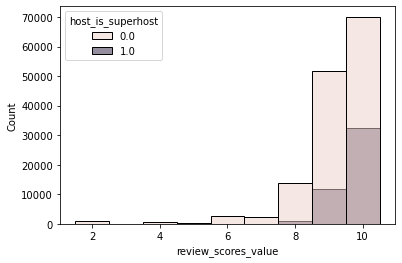

In [24]:
sns.histplot(raw_listing, x='review_scores_value', hue='host_is_superhost', discrete = True)

From the figure above, the distributions of overall ratings of the two classes seem to be the same. Most listings in both kinds of hosts tend to be scored high. The superhost title does not necessarily make customers more satisfied.

Then will best sellers tend to be scored higher?

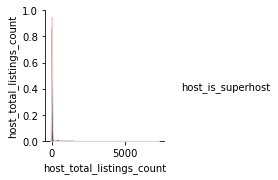

In [26]:
sns.pairplot(raw_listing[['host_is_superhost', 'host_total_listings_count']], hue='host_is_superhost')

# Correlation Design

## Amenity vs. Price

In [27]:
df = raw_listing.copy()
df['amenities'][0]

'["Heating", "Kitchen", "Washer", "Wifi", "Long term stays allowed"]'

First, for each value in the amenities column, convert the string with square brackets and quotation marks into a string with seperate words.

In [28]:
def remove_b_q(df_col): # Input a column whose instances are strings.
    to_blank = ['"', '[', ']', '/', '\\', '?', '!']
    for i in to_blank:
        df_col = df_col.replace(i, '')
        
    df_col = df_col.replace(' ,', ','); df_col = df_col.replace(', ', ',')
    df_col = df_col.lower() # For convenience, convert all words into lower cases.
    df_col = df_col.split(',')
    return df_col

In [29]:
df['amenities'] = df['amenities'].map(remove_b_q)

We try to explore whether there is a correlation between number of amenities of each house and price. This let us know **whether more amenities means a higher price**. Tally the number of amenities for each house; the number of amenities and price are both continuous variable thus we first try **Pearson Correlation**.

In [30]:
df['n_amenities'] = df['amenities'].map(len)
df[['amenities', 'n_amenities', 'price']]

,amenities,n_amenities,price
0,"[heating, kitchen, washer, wifi, long term sta...",5,53
1,"[shampoo, heating, kitchen, essentials, washer...",8,120
2,"[heating, tv, kitchen, washer, wifi, long term...",6,89
3,"[heating, tv, kitchen, wifi, long term stays a...",5,58
4,"[heating, tv, kitchen, essentials, hair dryer,...",12,60
...,...,...,...
279707,"[iron, heating, washer, dedicated workspace, e...",12,120
279708,"[shampoo, iron, heating, washer, hair dryer, e...",12,60
279709,"[paid parking off premises, shampoo, first aid...",15,50
279710,"[tv, iron, kitchen, hangers, smoke alarm, cabl...",15,105


In [31]:
df[['n_amenities', 'price']].corr()

,n_amenities,price
n_amenities,1.000000,0.028429
price,0.028429,1.000000


It seems that there is no significant correlation between the number of amenities and price. 

To further explore something about amenities, I create a dictionary to store each distinctive amenity (keys) and the index of houses that own it (values). 

In [32]:
def distinct_words(col_):
    words = {};
    for i in range(len(col_)):  
        for j in col_[i]:
            if j not in words.keys(): 
                words[j] = []
            words[j].append(i)
    return words


In [33]:
all_amenities = distinct_words(df['amenities'])

In [34]:
sorted(all_amenities.keys())
# Remove the ''
all_amenities.pop('')
sorted(all_amenities.keys())[0]

' amenities realgemu2019s -talentos do brasil feita a base de mel'

In [35]:
''' # One-hot coding for each amenity.
idx_amn = list(range(0, len(df), 1))
N_amenity = pd.DataFrame(index = idx_amn, columns = all_amenities.keys())
for i in N_amenitiy.col():
    N_amenity[all_amenities[i]] = 1
    N_amenity.all_amenities.fillna(value = 0)
'''

' # One-hot coding for each amenity.\nidx_amn = list(range(0, len(df), 1))\nN_amenity = pd.DataFrame(index = idx_amn, columns = all_amenities.keys())\nfor i in N_amenitiy.col():\n    N_amenity[all_amenities[i]] = 1\n    N_amenity.all_amenities.fillna(value = 0)\n'

Therefore, I want to know the distribution of housing price. 

When customer choose houses, they tend to set a range for housing prices choose from. Instead of regarding prices as continuous, **I use quartiles to partition the housing according to their prices into four classes: economical, comfortable, premium and luxury**. Let's assume that we working classes never consider houses of more than $1500 per night, which also makes the boxplot more intelligible.

First, check the boxplot of the housing prices and find the quartiles.

Text(0.5, 1.0, 'Boxplot of Housing Price')

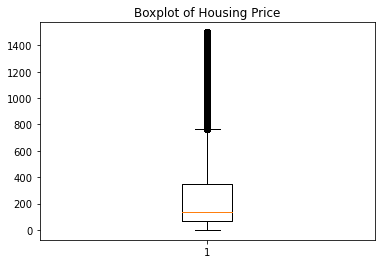

In [36]:
houses_cnsd = df[df['price'] <= 1500].copy()

plt.boxplot(np.array(houses_cnsd['price']).reshape(-1, 1))
plt.title('Boxplot of Housing Price')

Prices lower than the first quartile are in economical class, between the 25% quantile and the 75% quantile are comfortable, between the 75% quantile and  theoretical maximum ($q_{3} + 1.5 (q_{3} - q_{1})$) are permium, 
and the houses with prices higher than the theoretical maximum are luxury. In this way, we assign labels to them.

In [37]:
q_ = s.quantiles(houses_cnsd['price'], n = 4)
q1 = q_[0]; q2 = q_[1]; q3 = q_[2]

In [38]:
df['Label'] = np.nan;

In [40]:
for i in range(len(df)):
    if df['price'].iloc[i] < q1:
        df['Label'].iloc[i] = 'Economical'
    elif q1 <= df['price'].iloc[i] < q3:
        df['Label'].iloc[i] = 'Comfortable'
    elif q3 <= df['price'].iloc[i] < q3 + 1.5 * (q3 - q1):
        df['Label'].iloc[i] = 'Premium'
    else:  df['Label'].iloc[i] = 'Luxury'

df['Label']

KeyboardInterrupt: 

In [ ]:
df['Label'].hist()
plt.title('Distribution of Classes')

Also I would like to know the distribution of the amenities, checking thoes mostly pervasively owned.

In [121]:
n_amn = []
for i in sorted(all_amenities.keys()):
    n_amn.append(len(all_amenities))
Amenities = pd.DataFrame(columns = ['Amenity Names', 'Count'])

In [137]:
Amenities['Amenity Names'] = sorted(all_amenities.keys())
for i in range(len(Amenities)):
    Amenities['Count'][i] = len(all_amenities[Amenities['Amenity Names'][i]])

# Time Series Pattern Mining: Seasonality of Order Volume and Housing Prices

By merging the listing with reviews, I can get a time series table, which time stamps are the dates housings in listings were rated. I thus plan to see the locations of housings and times listings were made. I will first select a city and then in a time range spanning several years, I set month as the granularity, calculate the monthly mean price of listings and the volume of orders. Then I will use autocorrelation function to check if each series is autocorrelated thus has seasonality; if it has seasonality, I will try to describe the pattern of it. If both of them are periodic, then I try to find the correlation between them and build a quantitative model.

To ensure that every listing and price has a time stamp, I review left join listing data. Making sure there is no empth values.

In [41]:
rv = raw_listing[['listing_id', 'city', 'price']].copy();
ts = raw_review[['listing_id', 'date']].copy();
price_time = pd.merge(ts, rv, how = 'left')

In [42]:
price_time.isnull().sum()

listing_id    0
date          0
city          0
price         0
dtype: int64

Next, find a city.

In [43]:
price_time['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Hong Kong', 'Mexico City',
       'Cape Town', 'Rio de Janeiro', 'Sydney', 'Istanbul', 'Rome'],
      dtype=object)

New York has contrasting temperature in summer and winter, so first I will try New York housing prices. I built a new column 'Year_Month' facilitating calculation.

In [44]:
NY_price = price_time[price_time['city'] == 'New York'][['city', 'date', 'price']]

In [79]:
get_month_year(NY_price['date'].iloc[0])

'2019-12'

In [45]:
def get_month_year(date):
    return date[: -3]

NY_price['Month_Year'] = NY_price['date'].map(get_month_year)
NY_price

,city,date,price,Month_Year
1049370,New York,2019-12-01,74,2019-12
1049371,New York,2019-12-01,89,2019-12
1049372,New York,2019-12-01,85,2019-12
1049373,New York,2019-12-01,135,2019-12
1049374,New York,2019-12-01,250,2019-12
...,...,...,...,...
2065521,New York,2021-02-05,110,2021-02
2065522,New York,2021-01-30,46,2021-01
2065523,New York,2021-02-04,65,2021-02
2065524,New York,2021-01-31,30,2021-01


Then I simply calculate the monthly mean of prices and corresponding counts of orders.

In [81]:
avgp_NY = pd.DataFrame(columns = ['Month_Year', 'Avg_Price'])
avgp_ny = []
avgn_ny = []
for i in NY_price['Month_Year'].unique():
    avgp_ny.append(NY_price[NY_price['Month_Year'] == i]['price'].mean())
    avgn_ny.append(sum(NY_price[NY_price['Month_Year'] == i]['price']))

avgp_NY['Month_Year'] = NY_price['Month_Year'].unique();
avgp_NY['Avg_Price'] = avgp_ny
avgp_NY['n_Order'] = avgn_ny
avgp_NY = avgp_NY.sort_values('Month_Year').reset_index()
avgp_NY

,index,Month_Year,Avg_Price,n_Order
0,141,2009-04,83.000000,83
1,84,2009-05,86.500000,519
2,108,2009-06,95.000000,380
3,85,2009-07,92.625000,741
4,109,2009-08,183.428571,1284
...,...,...,...,...
138,15,2020-10,116.701857,1212649
139,25,2020-11,115.747641,1177385
140,27,2020-12,113.548595,1054980
141,24,2021-01,113.215798,1096495


To check the overall tendency of monthly average prices in NY and refer to the volume of orders at the same time, I use the dual axis plot.

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


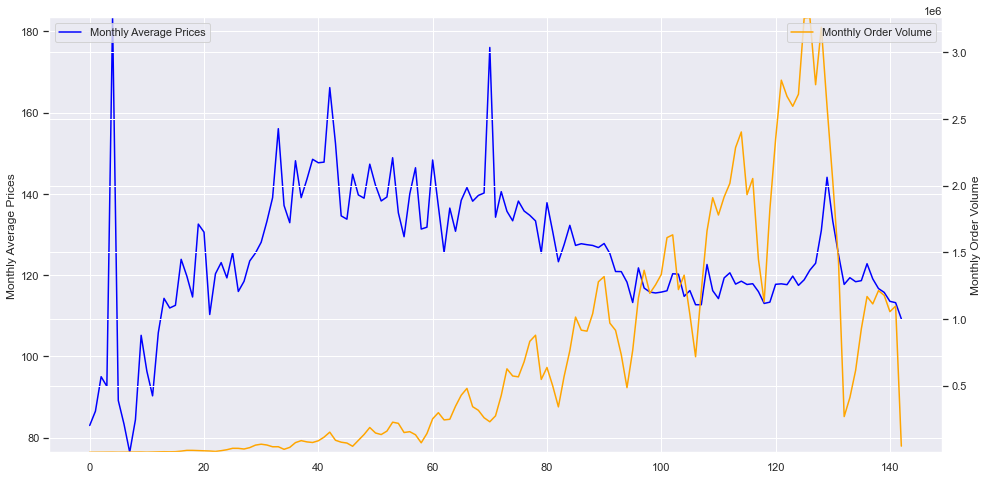

In [47]:
t_NY = np.arange(0, len(avgp_NY), 1)

sns.set(rc={"figure.figsize":(16, 8)})

ax1 = sns.lineplot(t_NY, avgp_NY['Avg_Price'], color='blue')
ax1.set_ylabel('Monthly Average Prices')
ax1.set_ylim(avgp_NY['Avg_Price'].min(), max(avgp_NY['Avg_Price']))
ax1.legend(['Monthly Average Prices'], loc="upper left")

ax2 = ax1.twinx()

ax2 = sns.lineplot(t_NY, avgp_NY['n_Order'], color='orange')
ax2.set_ylabel('Monthly Order Volume')
ax2.set_ylim(min(avgp_NY['n_Order']), max(avgp_NY['n_Order']))
ax2.set_xlabel('Time/Days')
ax2.legend(['Monthly Order Volume'], loc="upper right")

It is clear that, the monthly order volume has a significant seasonality and a increasing tendency; the sharp decrese of order volume in the back is likely due to the epidemic in 2020. But the series of the monthly order volue has a stable one-year's cycle.  
Then plot the autocorrelation function of monthly prices after normalization to see if there is seasonality.

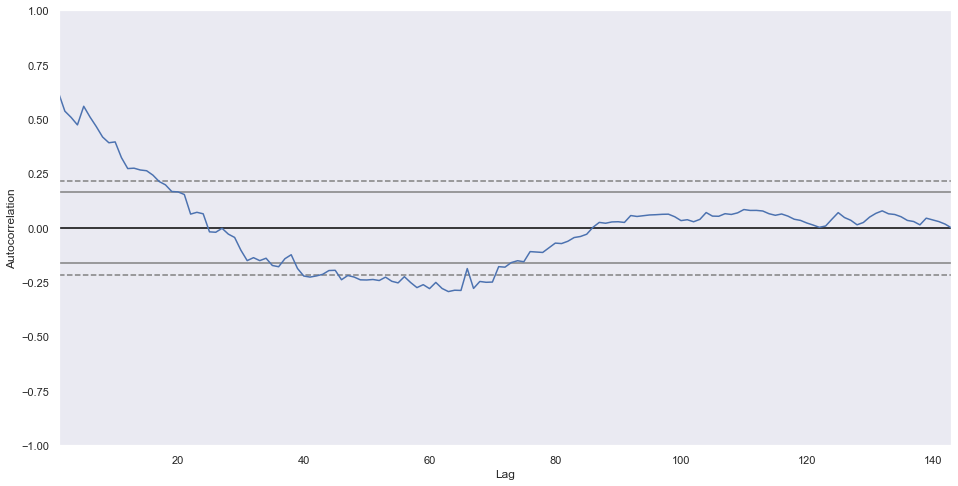

In [48]:
pd.plotting.autocorrelation_plot(normalize(avgp_NY[['Avg_Price']], axis = 0))

As it shows, the monthly mean price series is not stationary as ① it almost does not truncate; ② the fluctuation of monthly average price is likely to be periodic.  
But the ACF cannot interpret its specific fluctuations, like the main and subordinate cycles.So I decide to use wavelet transformation to ① denoise the monthly mean price series and ② use the denoised series to find the largest cycle and the finest.  
Furthermore, I will try to detect their causality and build a quantitative model to show this. Hopefully, the monthly order volume could be a predictor of the prices.

In [49]:
import pywt

First, normalize the monthly average price data (min-max) and try denoising it at **signal level (one level)** with db wavelets. I regard denoised searies as signals, then calculate the ratio of signal and noise (initial series - signal).

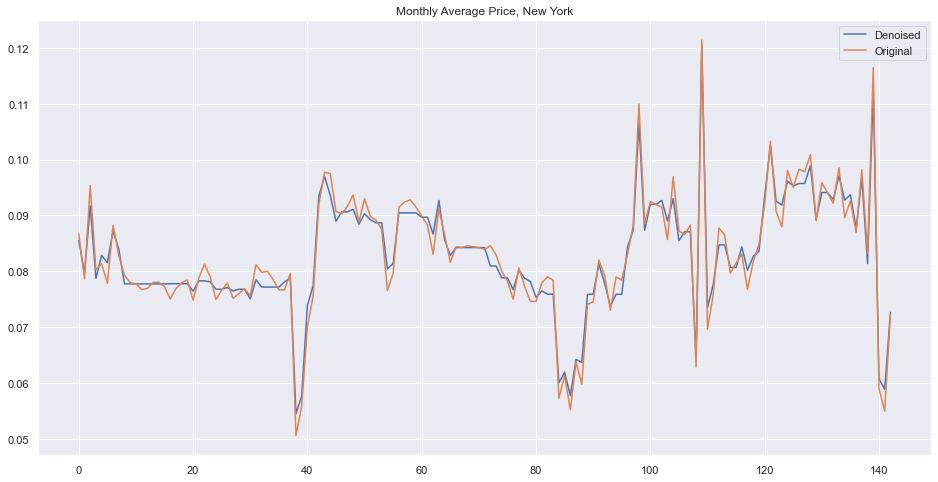

In [50]:
avgp_ny_ = normalize(np.array(avgp_ny).reshape(1, -1))[0]
coef = pywt.wavedec(avgp_ny_, 'db1', level = 3)
for i in range(1, len(coef)):
    coef[i] = pywt.threshold(coef[i], .1 * max(coef[i]))
dno_avgp_ny = pywt.waverec(coef[:], 'db1')
dno_avgp_ny = dno_avgp_ny[: -1]
plt.plot(np.arange(0, len(dno_avgp_ny)), dno_avgp_ny)
plt.plot(np.arange(0, len(avgp_ny_)), avgp_ny_)
plt.title('Monthly Average Price, New York')
plt.legend(['Denoised', 'Original'])

We assume the sampling period is 1 (a special unit here is trivial), then choose Morlet wavelet for continuous decomposition. To visualize the result, plot the global power spectrum.

Text(0.5, 1.0, 'Power Spectrum of NY Monthly Average Prices')

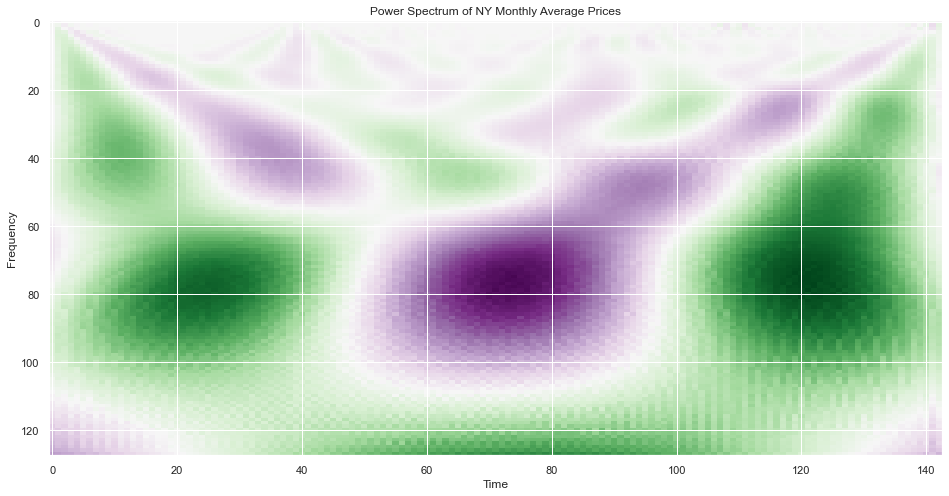

In [51]:
coefs_ctn, f = pywt.cwt(dno_avgp_ny, np.arange(1, 129, 1), 'morl')
plt.imshow(coefs_ctn, cmap = 'PRGn', aspect = 'auto',
           vmax = abs(coefs_ctn).max(), vmin = -abs(coefs_ctn).max())
plt.ylabel('Frequency');
plt.xlabel('Time');
plt.title('Power Spectrum of NY Monthly Average Prices')

If we search for a main and a finest cycle on purpose, we may see a roughly 4 years' when frequency is 50 Hertz and a 6 month's cycle when frequency is 10 Hertz. The latter is mych less significant (lighter color) as it does not have a significant fluctuation globally as the main cycles do, however this does not mean such cycle does not exist. As long as at this frequency, it has a more significant fluctuation than the ambient frequencies do, we can say there is a locally significant cycle.  
To show this clearer, I plot the wavelet variance, extract and plot the coefficients of the series at the frequency range [8, 20].

Text(0, 0.5, 'Wavelet Coefficients')

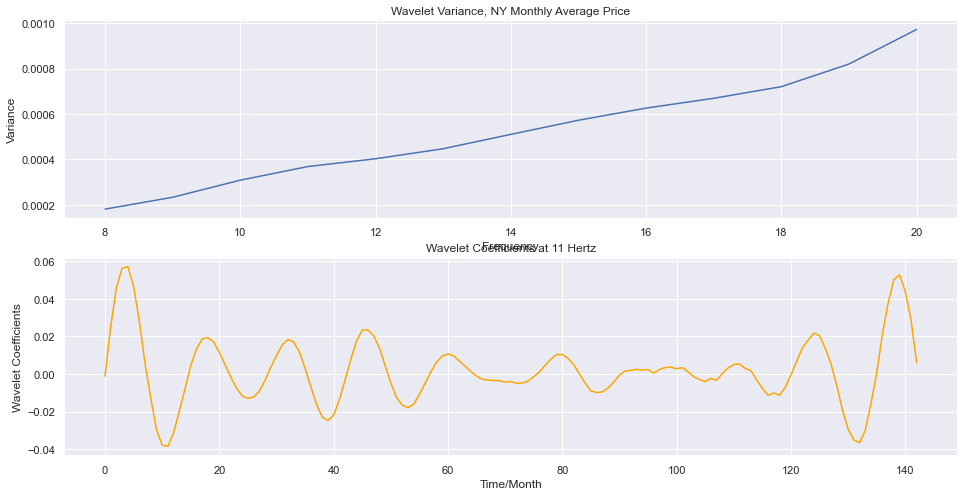

In [52]:
plt.subplot(211)
plt.plot(np.arange(8, 21, 1), np.var(coefs_ctn[8:21], axis = 1))
plt.xlabel('Frequency'); plt.ylabel('Variance')
plt.title('Wavelet Variance, NY Monthly Average Price')

plt.subplot(212)
plt.plot(np.arange(0, len(dno_avgp_ny), 1), coefs_ctn[10], c = 'orange')
plt.title('Wavelet Coefficients at 11 Hertz')
plt.xlabel('Time/Month'); plt.ylabel('Wavelet Coefficients')

Then I want to use Granger Causality Test to see if there is causality between monthly average price and order volume. The null hypothesis is 'Granger non causality'.

In [53]:
from statsmodels.tsa.stattools import grangercausalitytests

In [54]:
price_volume_ny = pd.DataFrame([coefs_ctn[10], avgp_NY['n_Order']]).transpose()
grangercausalitytests(price_volume_ny, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3245  , p=0.2518  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=1.3530  , p=0.2447  , df=1
likelihood ratio test: chi2=1.3466  , p=0.2459  , df=1
parameter F test:         F=1.3245  , p=0.2518  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8601  , p=0.0607  , df_denom=136, df_num=2
ssr based chi2 test:   chi2=5.9304  , p=0.0515  , df=2
likelihood ratio test: chi2=5.8091  , p=0.0548  , df=2
parameter F test:         F=2.8601  , p=0.0607  , df_denom=136, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8564  , p=0.0396  , df_denom=133, df_num=3
ssr based chi2 test:   chi2=9.0203  , p=0.0290  , df=3
likelihood ratio test: chi2=8.7416  , p=0.0329  , df=3
parameter F test:         F=2.8564  , p=0.0396  , df_denom=133, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6002  , p=0.1781  

{1: ({'ssr_ftest': (1.324454939919984, 0.25176999360092384, 139.0, 1),
   'ssr_chi2test': (1.3530402983355234, 0.2447473102167144, 1),
   'lrtest': (1.346634765752924, 0.2458672942495837, 1),
   'params_ftest': (1.3244549399200294, 0.2517699936009172, 139.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.860065174429676, 0.06071567641960498, 136.0, 2),
   'ssr_chi2test': (5.930429258743888, 0.05154940404148431, 2),
   'lrtest': (5.809103277401846, 0.05477334334420574, 2),
   'params_ftest': (2.860067570234851, 0.06071553682803438, 136.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.8564155494107855, 0.039564412053398064, 133.0, 3),
   'ssr_chi2test': (9.020259629718268, 0.029022732901807496, 3),
   'lrtest': (8.741578266712622, 0.032931570420843576, 3),
   'params_ftest': (2.8564171312968756, 0.03956433222834909, 133.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

I also want to check the temporal pattern of monthly average price in other cities.

In [56]:
price_time['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Hong Kong', 'Mexico City',
       'Cape Town', 'Rio de Janeiro', 'Sydney', 'Istanbul', 'Rome'],
      dtype=object)

The listings covers cities almost in every continent, so I want to apply the same methods above to visualize the monthly average housing price and order volume of these cities. Assembling the procedures above as functions.

In [107]:
def price_a_city(df, city):
    
    def get_month_year(date):
        return date[: -3]
    
    # Constructing the Month-Year table for a city.
    city_price = df[df['city'] == city][['city', 'date', 'price']].copy()
    city_price['Month_Year'] = city_price['date'].map(get_month_year)

    # The table of monthly average price and order volume.
    avgpn_city = pd.DataFrame(columns = ['Month_Year', 'Avg_Price', 'n_Order'])
    avgp_ = []
    avgn_ = []
    for i in city_price['Month_Year'].unique():
        avgp_.append(city_price[city_price['Month_Year'] == i]['price'].mean())
        avgn_.append(sum(city_price[city_price['Month_Year'] == i]['price']))

    avgpn_city['Month_Year'] = city_price['Month_Year'].unique();
    avgpn_city['Avg_Price'] = avgp_
    avgpn_city['n_Order'] = avgn_
    avgpn_city = avgpn_city.sort_values('Month_Year').reset_index()
    
    return city_price, avgpn_city # Return the two tables.

def vis_p_n(city, avgpn_city):
    t_ = np.arange(0, len(avgpn_city), 1)

    sns.set(rc={"figure.figsize":(16, 8)})

    ax1 = sns.lineplot(t_, avgpn_city['Avg_Price'], color='blue')
    ax1.set_ylabel('Monthly Average Prices')
    ax1.set_ylim(avgpn_city['Avg_Price'].min(), max(avgpn_city['Avg_Price']))
    ax1.legend(['Monthly Average Prices, {}'.format(city)], loc="upper left")

    ax2 = ax1.twinx()

    ax2 = sns.lineplot(t_, avgpn_city['n_Order'], color='orange')
    ax2.set_ylabel('Monthly Order Volume')
    ax2.set_ylim(min(avgpn_city['n_Order']), max(avgpn_city['n_Order']))
    ax2.set_xlabel('Time/Days')
    ax2.legend(['Monthly Order Volume, {}'.format(city)], loc="upper right")

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


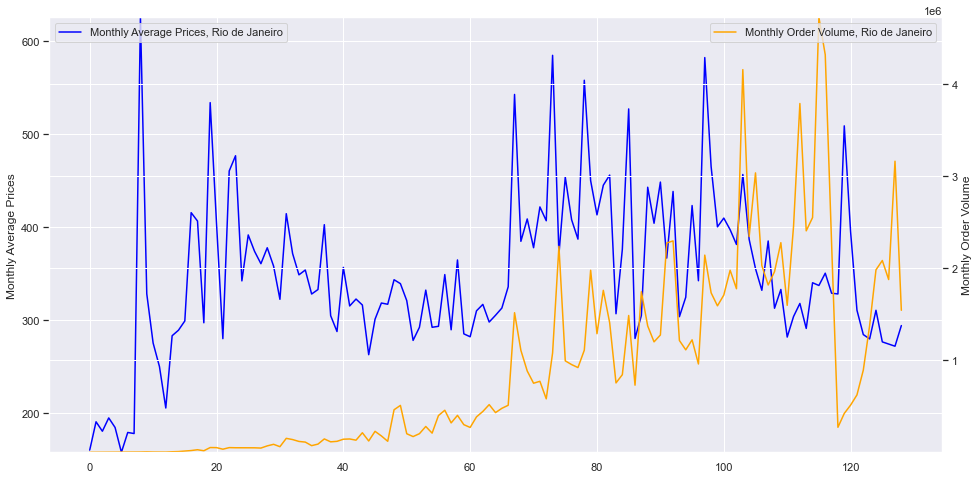

In [108]:
Price_Rio, p_n_Rio = price_a_city(price_time, 'Rio de Janeiro')
vis_p_n('Rio de Janeiro', p_n_Rio)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


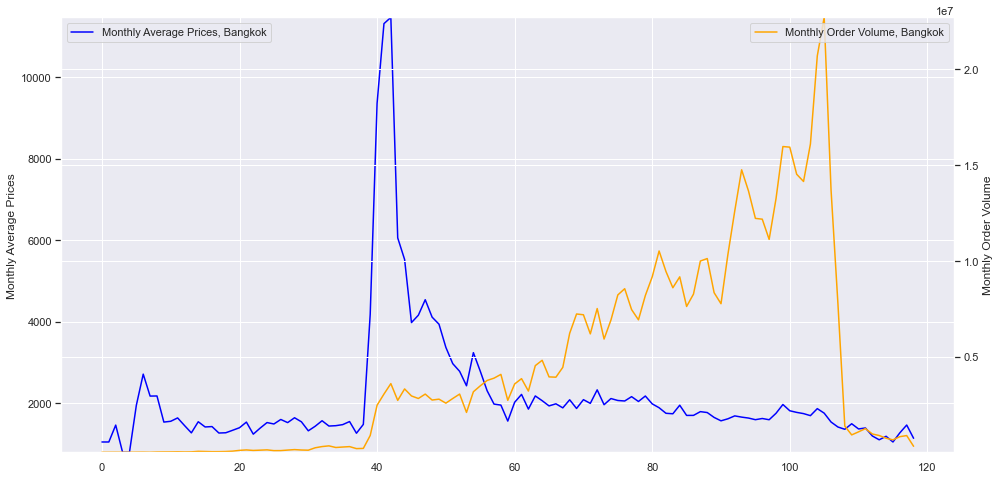

In [109]:
Price_Bangkok, p_n_Bangkok = price_a_city(price_time, 'Bangkok')
vis_p_n('Bangkok', p_n_Bangkok)

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


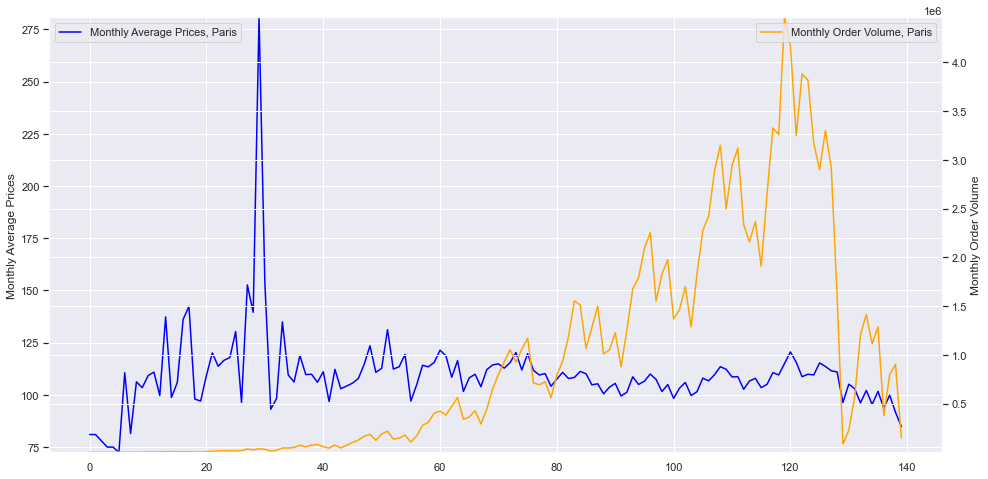

In [110]:
Price_Paris, p_n_Paris = price_a_city(price_time, 'Paris')
vis_p_n('Paris', p_n_Paris)

There are seasonalies on different extent in the three chosen cities, Rio, Paris and Bangkok. But note that there are significant spiking average prices in Paris and Bangkok, while **the order volume in Bangkok significantly rises but stays normal in Paris**. I want to find possible causation for the sudden rising prices in Paris and Bankok. I locate the year-month of the two extremes then search if there are big events that may pertain to.

In [111]:
ext_date_Bangkok = p_n_Bangkok['Month_Year'].iloc[p_n_Bangkok[['Avg_Price']].idxmax(axis = 0)]
ext_date_Paris = p_n_Paris['Month_Year'].iloc[p_n_Paris[['Avg_Price']].idxmax(axis = 0)]

In [112]:
print('Abnormal Average Price in Bangkok, {}; in Paris, {}'.format(ext_date_Bangkok.values, ext_date_Paris.values))

Abnormal Average Price in Bangkok, ['2014-10']; in Paris, ['2011-12']


For Paris, I found its Residential Property Index (RPI) (https://www.compassft.com/indice/parissqm/) and plot it. In 2011 and 2012, the RPI rises unprecedentedly, which corresponds to the monthly average prices during that time. So the rising  price of residential property might be a cause.

In [127]:
RPI_Paris = pd.read_csv('D:\DS\parissqm_20221216_230025.csv')
RPI_Paris

,Date,PARISSQM
0,2022-12-16T00:00:00,10676
1,2022-12-02T00:00:00,10759
2,2022-11-18T00:00:00,10789
3,2022-11-04T00:00:00,10748
4,2022-10-21T00:00:00,10785
...,...,...
402,2007-07-20T00:00:00,6044
403,2007-07-06T00:00:00,5929
404,2007-06-22T00:00:00,5932
405,2007-06-08T00:00:00,5954


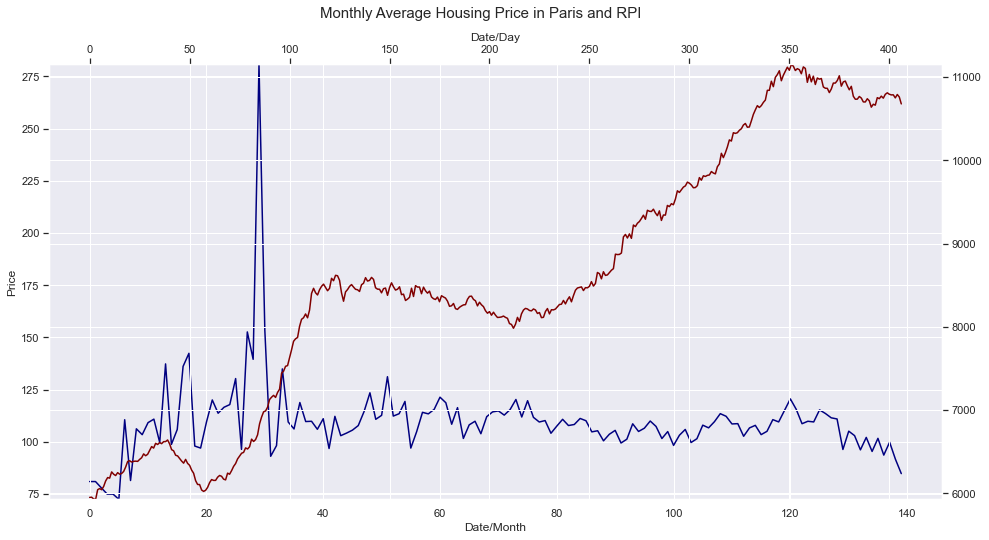

In [140]:
t1 = np.arange(0, len(p_n_Paris)); y1 = p_n_Paris['Avg_Price']
fig, axes = plt.subplots()
axes.plot(t1, y1, c = 'navy')
axes.set_xlabel('Date/Month', fontsize=12)
axes.set_ylabel('Price', fontsize=12)
axes.set_ylim(min(y1), max(y1))

twin_axes = axes.twinx().twiny()
t2 = np.arange(0, len(RPI_Paris))
y2 = RPI_Paris['PARISSQM'][:: -1]
twin_axes.plot(t2, y2, c = 'maroon')
twin_axes.set_ylim(min(y2), max(y2))
twin_axes.set_xlabel('Date/Day',fontsize=12)
twin_axes.set_ylabel('Residential Property Index, Paris', fontsize=12)

fig.suptitle('Monthly Average Housing Price in Paris and RPI', fontsize=15)
#fig.set_size_inches(10, 8)
plt.show()